# 2. Keras - Cifar 10 Dataset

Sources: 
https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/    
https://qph.fs.quoracdn.net/main-qimg-704ab7dc6b6ea6e7e919daab06a63537

Here I shall use convolutional neural networks to classify 10 different types of images.

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

from keras.preprocessing.image import ImageDataGenerator

In [2]:
import matplotlib.pyplot as plt

In [3]:
# CIFAR_10 is a dataset of 60,000 images of  32x32 pixels on 3 channels(RBG)

In [4]:
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# Constant
BATCH_SIZE = 128
NB_EPOCH = 40
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [5]:
# Load dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170500096/170498071 [==============================] - 1780s 10us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
# convert to categorical

In [7]:
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 

In [8]:
# float and normalization

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Scaling
X_train /= 255
X_test /= 255

In [10]:
# Network Building

In [11]:
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same',
                        input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

# Padding Explained

Padding is applied when a kernel is applied to the edge of our image. Additional 'fictional' pixels are added to the border. All 'fictional' pixels have a value of zero. Depending on the number of outer layers of fictional pixels there are distinguishes us between two types of padding...

Full padding is when you increase the size of the output. This is done by introducting enough fictional pixels such that every 'real' pixel is visited by the kernal the same number of times. 

Same padding is when the output is ensured to be the same size as the input by creating enough fictional pixels that have a value of zero.

Padding essentially makes the feature maps produced by the filter kernels the same size as the original image. This is very useful for deep CNN’s as we don’t want the output to be reduced so that we only have a 2x2 region left at the end of the network upon which to predict our result.

In [12]:
# Model Summary and Compilation

In [13]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [15]:
# Training the Network

In [16]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
    epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
    verbose=VERBOSE)

Epoch 1/40
313/313 [==============================] - 59s 190ms/step - loss: 1.9651 - accuracy: 0.2744 - val_loss: 1.7230 - val_accuracy: 0.3640
Epoch 2/40
313/313 [==============================] - 59s 190ms/step - loss: 1.6416 - accuracy: 0.3978 - val_loss: 1.4368 - val_accuracy: 0.4802
Epoch 3/40
313/313 [==============================] - 60s 192ms/step - loss: 1.4823 - accuracy: 0.4603 - val_loss: 1.3616 - val_accuracy: 0.5038
Epoch 4/40
313/313 [==============================] - 63s 202ms/step - loss: 1.3850 - accuracy: 0.4984 - val_loss: 1.2839 - val_accuracy: 0.5373
Epoch 5/40
313/313 [==============================] - 63s 202ms/step - loss: 1.3039 - accuracy: 0.5307 - val_loss: 1.2739 - val_accuracy: 0.5372
Epoch 6/40
313/313 [==============================] - 4138s 13s/step - loss: 1.2345 - accuracy: 0.5590 - val_loss: 1.1710 - val_accuracy: 0.5796
Epoch 7/40
313/313 [==============================] - 59s 187ms/step - loss: 1.1810 - accuracy: 0.5794 - val_loss: 1.0929 - val_ac

In [17]:
print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Testing...
79/79 [==============================] - 3s 41ms/step - loss: 0.8388 - accuracy: 0.7175

Test score: 0.8388040065765381
Test accuracy: 0.7174999713897705


In [18]:
# Saving the model for later Use

In [19]:
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


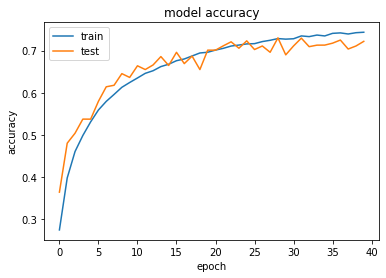

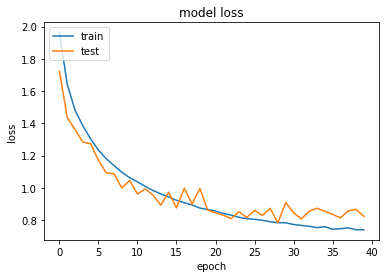

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()